In [1]:
import numpy as np
import seaborn as sns

## 2.7. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [4]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


## 2.8. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (2) 다시 한 번 직접 설계해 보는 손실함수

### 2.8.1. `model`, `MSE`, `loss`

In [5]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [7]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


### 2.8.2. X, W, b, y

In [8]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [10]:
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [11]:
X[:,0].shape

(244,)

In [12]:
W[0].shape

()

In [13]:
prediction = 0
i=0
prediction += X[:,i]*W[i]
print(prediction.shape)

(244,)


In [14]:
print(X.shape)
print(W.shape)

(244, 12)
(12,)


In [15]:
M = model(X,W,b)
M.shape

(244,)

In [16]:
MSE(model(X,W,b),y)

207.48390818187826

In [17]:
loss(X,W,b,y)

207.48390818187826

`X`는 244x12의 행렬이다.
`W`는 12차원의 벡터이다.
`b`는 스칼라이다.
W는 수학적으로는 12x1 열벡터로 이해하는 것이 좋겠다.
이때 M = XW+b이고, 이때, b는 한 숫자가 244개 있는 244차원 벡터로 생각할 수 있다.

### 2.8.3. XX, WW, bb, yy

In [18]:
XX = np.array([[1,2],[3,1],[2,3],[1,2],[3,1]]).astype(float)
WW = np.array([1,1]).astype(float)
bb = 5
yy = np.array([0,0,0,0,0]).astype(float)

In [19]:
print(type(XX))
print(XX.shape)
print(type(WW))
print(WW.shape)
print(type(bb))
print(type(yy))
print(yy.shape)

<class 'numpy.ndarray'>
(5, 2)
<class 'numpy.ndarray'>
(2,)
<class 'int'>
<class 'numpy.ndarray'>
(5,)


In [20]:
M = model(XX,WW,bb)
M.shape

(5,)

In [21]:
model(XX,WW,bb)

array([ 8.,  9., 10.,  8.,  9.])

In [22]:
MSE(model(XX,WW,bb),yy)

78.0

In [23]:
loss(XX,WW,bb,yy)

78.0

## 2.9. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

In [24]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [25]:
gradient(X,W,b,y)

(array([12614.0788244 ,  1540.1784968 ,   370.30851213,   182.1096426 ,
          216.52522185,   335.89293288,   131.84056307,    37.00269432,
          200.07364389,   183.50125345,   140.66530451,   411.75285022]),
 27.168105970483815)

In [26]:
gradient(XX,WW,bb,yy)

(array([90., 80.]), 17.6)

## 2.10. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (4) 모두 준비 되었다면, 모델 학습은 간단하다구

In [27]:
LEARNING_RATE = 0.0001

In [28]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2.6752
Iteration 20 : Loss 2.5902
Iteration 30 : Loss 2.5187
Iteration 40 : Loss 2.4516
Iteration 50 : Loss 2.3886
Iteration 60 : Loss 2.3295
Iteration 70 : Loss 2.2739
Iteration 80 : Loss 2.2218
Iteration 90 : Loss 2.1727
Iteration 100 : Loss 2.1266
Iteration 110 : Loss 2.0833
Iteration 120 : Loss 2.0425
Iteration 130 : Loss 2.0041
Iteration 140 : Loss 1.9679
Iteration 150 : Loss 1.9339
Iteration 160 : Loss 1.9018
Iteration 170 : Loss 1.8715
Iteration 180 : Loss 1.8430
Iteration 190 : Loss 1.8160
Iteration 200 : Loss 1.7906
Iteration 210 : Loss 1.7666
Iteration 220 : Loss 1.7439
Iteration 230 : Loss 1.7224
Iteration 240 : Loss 1.7021
Iteration 250 : Loss 1.6829
Iteration 260 : Loss 1.6646
Iteration 270 : Loss 1.6474
Iteration 280 : Loss 1.6310
Iteration 290 : Loss 1.6155
Iteration 300 : Loss 1.6007
Iteration 310 : Loss 1.5867
Iteration 320 : Loss 1.5733
Iteration 330 : Loss 1.5606
Iteration 340 : Loss 1.5486
Iteration 350 : Loss 1.5371
Iteration 360 : Loss 1.5261
I

In [29]:
losseslosses = []

for i in range(1, 1001):
    dWW, dbb = gradient(XX, WW, bb, yy)
    WW -= LEARNING_RATE * dWW
    bb -= LEARNING_RATE * dbb
    LL = loss(XX, WW, bb, yy)
    losseslosses.append(LL)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, LL))

Iteration 10 : Loss 72.1148
Iteration 20 : Loss 66.6786
Iteration 30 : Loss 61.6572
Iteration 40 : Loss 57.0189
Iteration 50 : Loss 52.7345
Iteration 60 : Loss 48.7770
Iteration 70 : Loss 45.1214
Iteration 80 : Loss 41.7447
Iteration 90 : Loss 38.6256
Iteration 100 : Loss 35.7444
Iteration 110 : Loss 33.0831
Iteration 120 : Loss 30.6247
Iteration 130 : Loss 28.3539
Iteration 140 : Loss 26.2562
Iteration 150 : Loss 24.3186
Iteration 160 : Loss 22.5287
Iteration 170 : Loss 20.8754
Iteration 180 : Loss 19.3481
Iteration 190 : Loss 17.9372
Iteration 200 : Loss 16.6340
Iteration 210 : Loss 15.4301
Iteration 220 : Loss 14.3180
Iteration 230 : Loss 13.2907
Iteration 240 : Loss 12.3417
Iteration 250 : Loss 11.4650
Iteration 260 : Loss 10.6551
Iteration 270 : Loss 9.9070
Iteration 280 : Loss 9.2158
Iteration 290 : Loss 8.5773
Iteration 300 : Loss 7.9875
Iteration 310 : Loss 7.4425
Iteration 320 : Loss 6.9391
Iteration 330 : Loss 6.4740
Iteration 340 : Loss 6.0443
Iteration 350 : Loss 5.6473
Ite

In [30]:
print(losses)
print(losseslosses)

[78.7836311625837, 30.51908584577195, 12.87703532117341, 6.425090691349203, 4.0622679299916085, 3.1937251377829234, 2.8712549305290676, 2.748363131118179, 2.69843361178672, 2.6751980858954965, 2.661748977448752, 2.651907703212482, 2.643416270117864, 2.635449348687162, 2.6277051348629903, 2.6200731327161697, 2.6125127555884546, 2.605008964510508, 2.5975560575820436, 2.59015174627699, 2.5827949907970065, 2.575485209056546, 2.5682219876204653, 2.5610049760651883, 2.5538338483665908, 2.546708288780842, 2.5396279866755385, 2.532592634631517, 2.5256019277399027, 2.5186555633359866, 2.51175324089279, 2.5048946619730508, 2.4980795302026175, 2.491307551251729, 2.4845784328192413, 2.4778918846179896, 2.4712476183606285, 2.4646453477457095, 2.458084788443901, 2.4515656580843284, 2.4450876762410094, 2.438650564419389, 2.432254046042969, 2.4258978464400296, 2.4195816928304437, 2.4133053143125807, 2.4070684418503077, 2.400870808260068, 2.3947121481980655, 2.3885921981475238, 2.382510696406044, 2.376

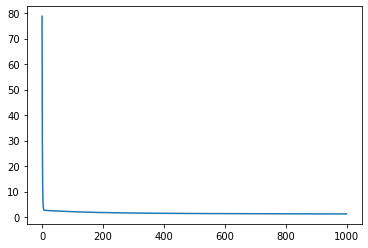

In [31]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

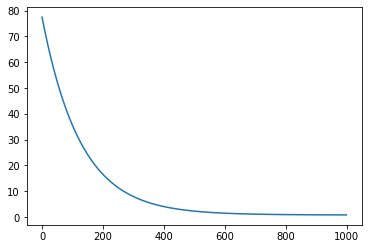

In [32]:
import matplotlib.pyplot as plt
plt.plot(losseslosses)
plt.show()

In [33]:
W, b

(array([ 0.07765846, -0.04426838,  0.35818535,  0.28607064, -0.1351679 ,
        -0.14232383,  0.53641243,  0.26756959,  0.22488773,  0.44772706,
         0.30092962,  0.43416213]),
 0.7850215488388576)

In [34]:
WW, bb

(array([-1.15019298, -1.05850225]), 4.538114155475172)

In [38]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.725851623779712

In [39]:
predictionprediction = model(XX, WW, bb)
msemse = loss(XX, WW, bb, yy)
msemse

0.8223145684125684

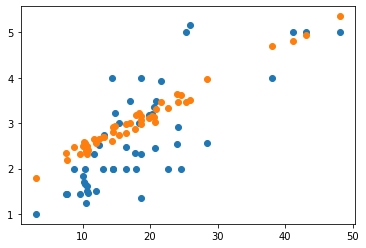

In [40]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

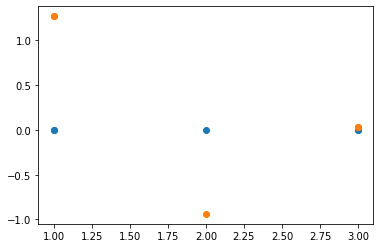

In [41]:
plt.scatter(XX[:, 0], yy)
plt.scatter(XX[:, 0], predictionprediction)
plt.show()